In [1]:
"""!pip install networkx
!pip install tqdm
!pip install numpy
!pip install matplotlib"""

'!pip install networkx\n!pip install tqdm\n!pip install numpy\n!pip install matplotlib'

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from utils_graph_generation import get_paths,load_graph
from utils_graph_metrics import calc_clust
from utils_graph_plot import get_all_markers, plot_clust_by_tres_fig2e

# Proceso de creación de subgrafos

In [4]:
# Carga un grafo dado un nombre y una ruta de archivos , devuelve los parametros necesarios
# para hacer las gráficas 2e y 2a
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL)

In [5]:

# Seleccionamos el modo con el que queremos crear nuestra red: Hashtags como nodos o usuarios como nodos
#MODE = "user"
MODE = "hashtag"

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 600

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar

MANIFESTACION = "nat"
# Hora critica NaT
hora = "429624"

MANIFESTACION = "9n"
# Hora critica 9n
hora = "437038"
#hora = "437037"

graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="correlation")
dict_tres_avg_clust_fig2e, arr_norm_int_deg_fig2a = calc_plots(hora, MAX_UMBRAL, graphs_folder)

Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


 63%|██████▎   | 379/600 [00:06<00:03, 58.86it/s] 


In [6]:
# Dado un array con diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)
def plot_avg_clust_by_norm_int_deg_fig2a(arr_norm_int_deg_fig2a, MANIFESTACION, hora, plots_folder, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250], with_lines=False, dot_size=4, alpha=0.7):
    if len(arr_kt_plot) > 30:
        print("Error, el número de elementos a graficar no puede ser mayor a 30, cogemos solo los primeros 30")
        arr_kt_plot = arr_kt_plot[:30]
    #arr_index = [5, 50, 100]
    markers = get_all_markers()
    # Crea el histograma
    plt.style.use('seaborn-v0_8-darkgrid')

    plt.xscale('log')  
    plt.yscale('log')      
    for i, index in enumerate(arr_kt_plot):
        points_x = arr_norm_int_deg_fig2a[index].keys()
        points_y = arr_norm_int_deg_fig2a[index].values()
        if with_lines:
            plt.plot(points_x, points_y, alpha=alpha)
        plt.scatter(points_x, points_y, alpha=alpha, s=dot_size,marker=markers[i], label=f'K_T: {index}')        
    
    plt.xlabel("Grado interno normalizado")
    plt.ylabel("coeficiente de clusterización medio\n de nodos con mismo internal degree normalizado")

    plt.title(str(hora) + " (" + MANIFESTACION + ") - Fig. 2a")
    plt.legend()
    plt.savefig(plots_folder + hora + "_Fig_2a - K_T_" + str(arr_kt_plot) + ".png")
    plt.show()

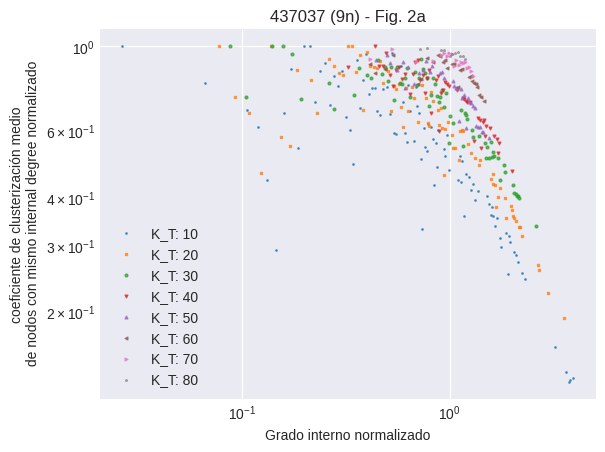

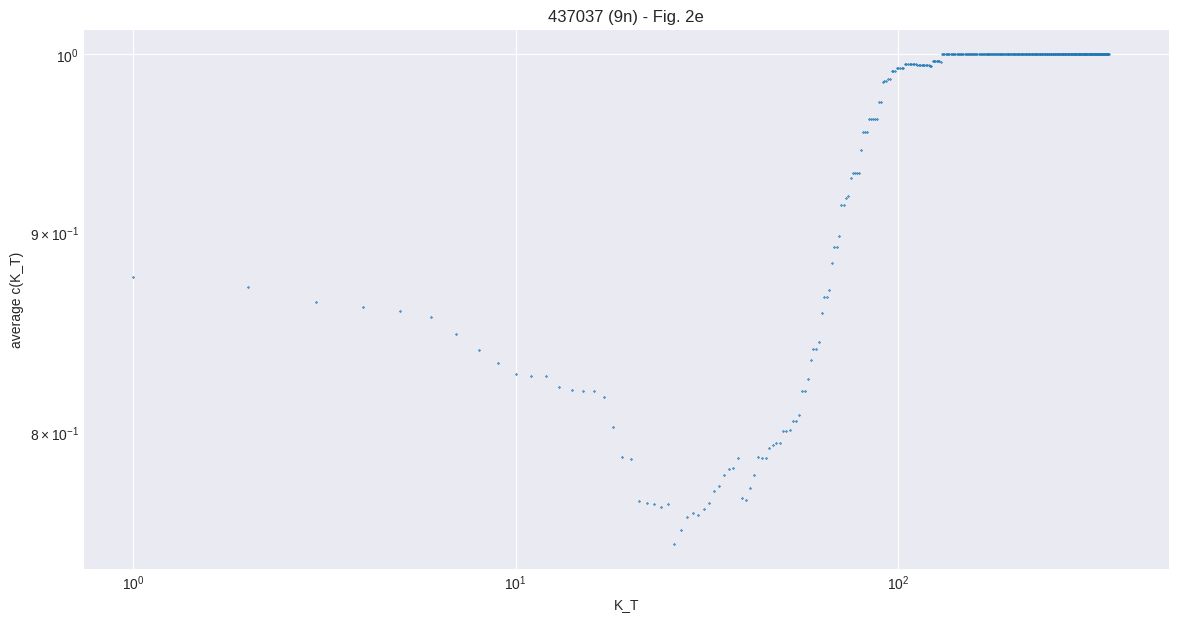

In [7]:
arr_kt_plot=[10,20,30,40,50,60,70,80]
# Fig 2a
plot_avg_clust_by_norm_int_deg_fig2a(arr_norm_int_deg_fig2a, MANIFESTACION, hora, plots_folder, arr_kt_plot=arr_kt_plot, with_lines=False)

# Fig 2e
plot_clust_by_tres_fig2e(dict_tres_avg_clust_fig2e, MANIFESTACION , hora, plots_folder)

In [8]:
#H = tresh_normalization(G, 1)
#A graph is commonly classified as small-world if sigma>1.
sigma = nx.smallworld.sigma(G)
print("a")
# Values close to 0 mean that G has small-world characteristics.
omega = nx.smallworld.omega(G)

print("sigma: ", sigma, ", omega: ", omega)

NameError: name 'G' is not defined